# Netflix Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
# load data 
df = pd.read_csv("./netflix_titles_nov_2019.csv")
print(df.head())

    show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
4  80213643                      Chip and Potato                         NaN   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country         date_added  release_year rating  \
0               South Korea  November 30, 2019          2019  TV-14   
1                       NaN  November 30

In [3]:
# basic info about data
print("Shape of data \n", df.shape, "\n")
print("columns of data \n", df.columns, "\n")
print("info of data \n", df.info(), "\n")


Shape of data 
 (5837, 12) 

columns of data 
 Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB
info of data 
 None 

In [4]:
# clean the data

total_nulls = df.isnull().sum()
print("Total null values \n", total_nulls, "\n")

Total null values 
 show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64 



In [5]:
# first find the common values in null columns
common_director = df["director"].mode()
print("Common director \n", common_director, "\n")

# fill director null values with common_director
df["director"].fillna(common_director[0],inplace=True)

Common director 
 0    Raúl Campos, Jan Suter
Name: director, dtype: object 



/tmp/ipykernel_6879/4097602331.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["director"].fillna(common_director[0],inplace=True)


In [6]:
# drop cast column
df.drop(columns=["cast"],inplace=True)

In [7]:
# find common country
common_country = df["country"].mode()
print("custom common_country \n", common_country)

# fill null values with common_country
df["country"].fillna(common_country[0],inplace=True)

custom common_country 
 0    United States
Name: country, dtype: object


/tmp/ipykernel_6879/26010091.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["country"].fillna(common_country[0],inplace=True)


In [8]:
# find the common date 
common_date = df["date_added"].mode()
print("common date \n", common_date)
df["date_added"].fillna(common_date[0],inplace=True)

common date 
 0    November 1, 2019
Name: date_added, dtype: object


/tmp/ipykernel_6879/2699961736.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["date_added"].fillna(common_date[0],inplace=True)


In [9]:
# fill null values in rating
df["rating"].fillna(df["rating"].mode()[0],inplace=True)

/tmp/ipykernel_6879/4058720854.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating"].fillna(df["rating"].mode()[0],inplace=True)


# Data View

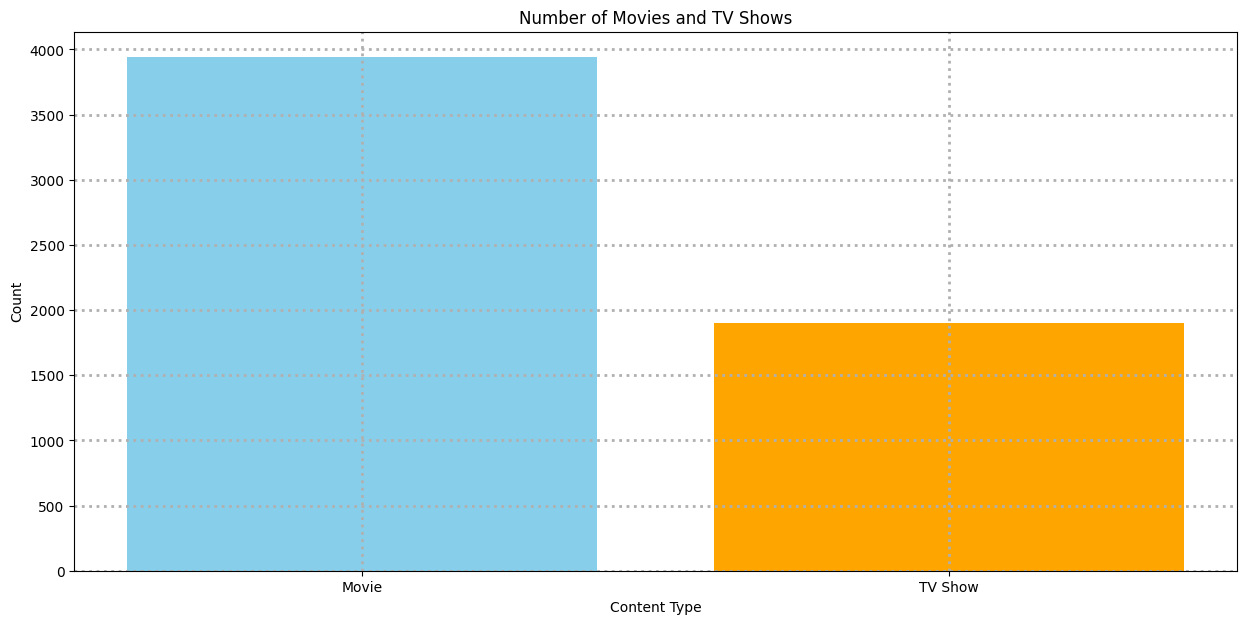

In [23]:
content_type = df["type"].value_counts()
plt.figure(figsize=(15,7))
plt.bar(content_type.index , content_type.values , color=["skyblue","orange"])
plt.title("Number of Movies and TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.grid(linestyle=":",linewidth=2)
plt.show()

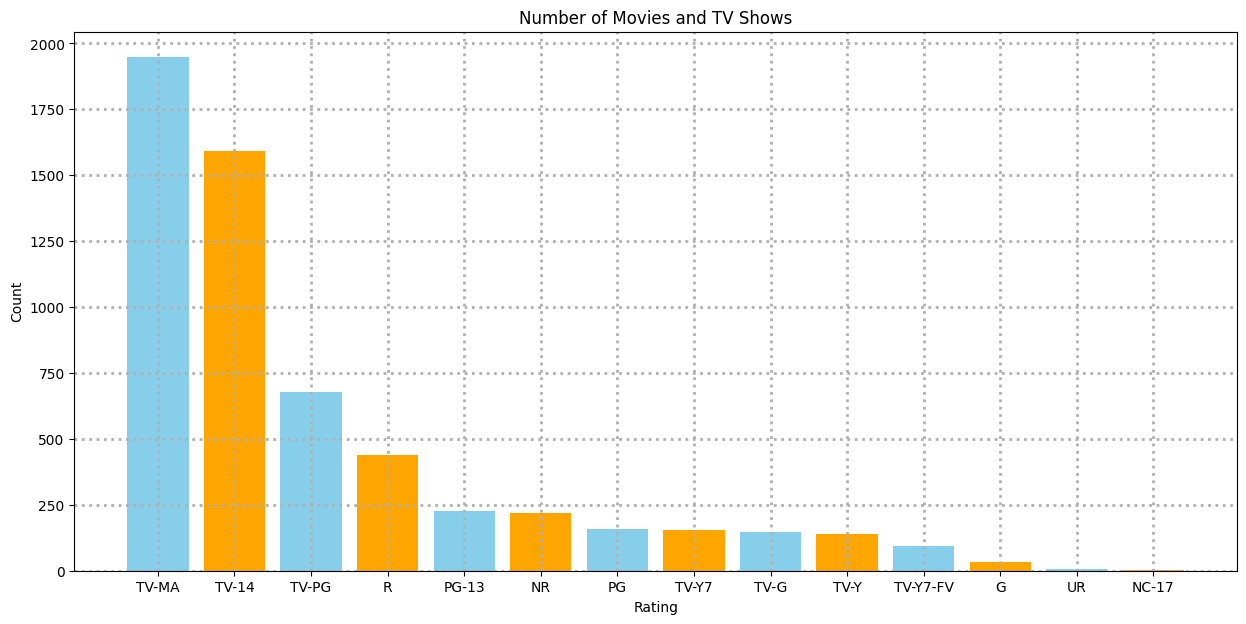

In [29]:
# value of rating
ratting = df["rating"].value_counts()
plt.figure(figsize=(15,7))
plt.bar(ratting.index, ratting.values, color=["skyblue","orange",])
plt.title("Number of Movies and TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(linestyle=":",linewidth=2)
plt.show()

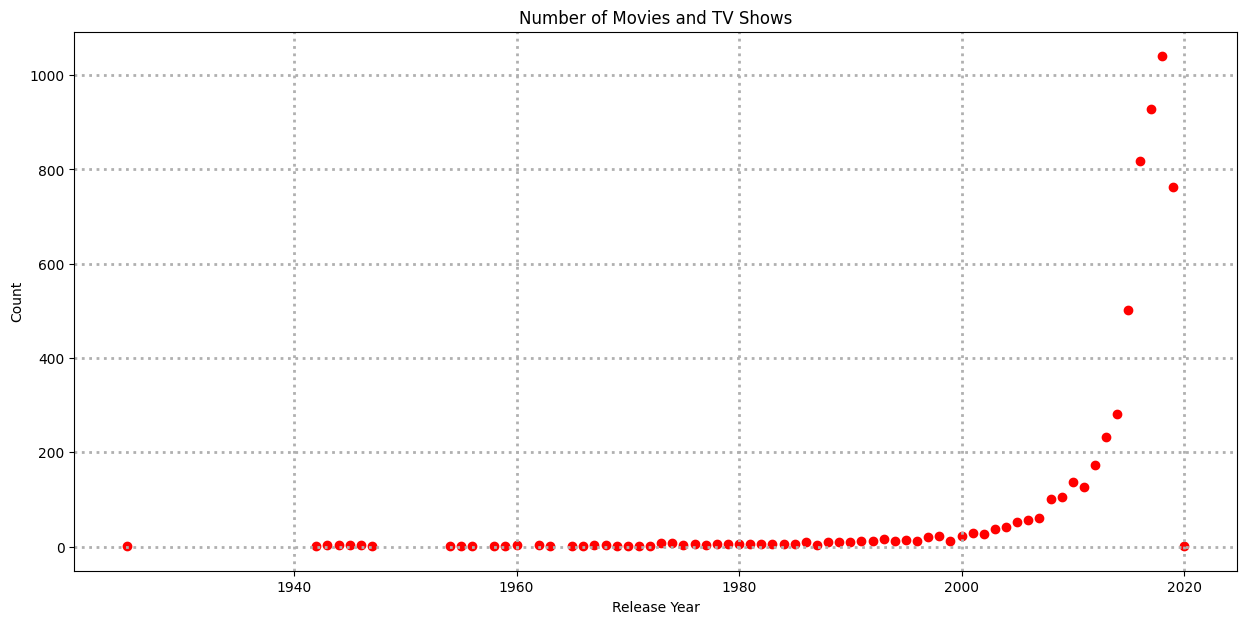

In [38]:
# release_year number of movies
release_year = df["release_year"].value_counts().sort_index()
plt.figure(figsize=(15,7))
plt.scatter(release_year.index, release_year.values, color="red")
plt.title("Number of Movies and TV Shows")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.grid(linestyle=":",linewidth=2)
plt.show()

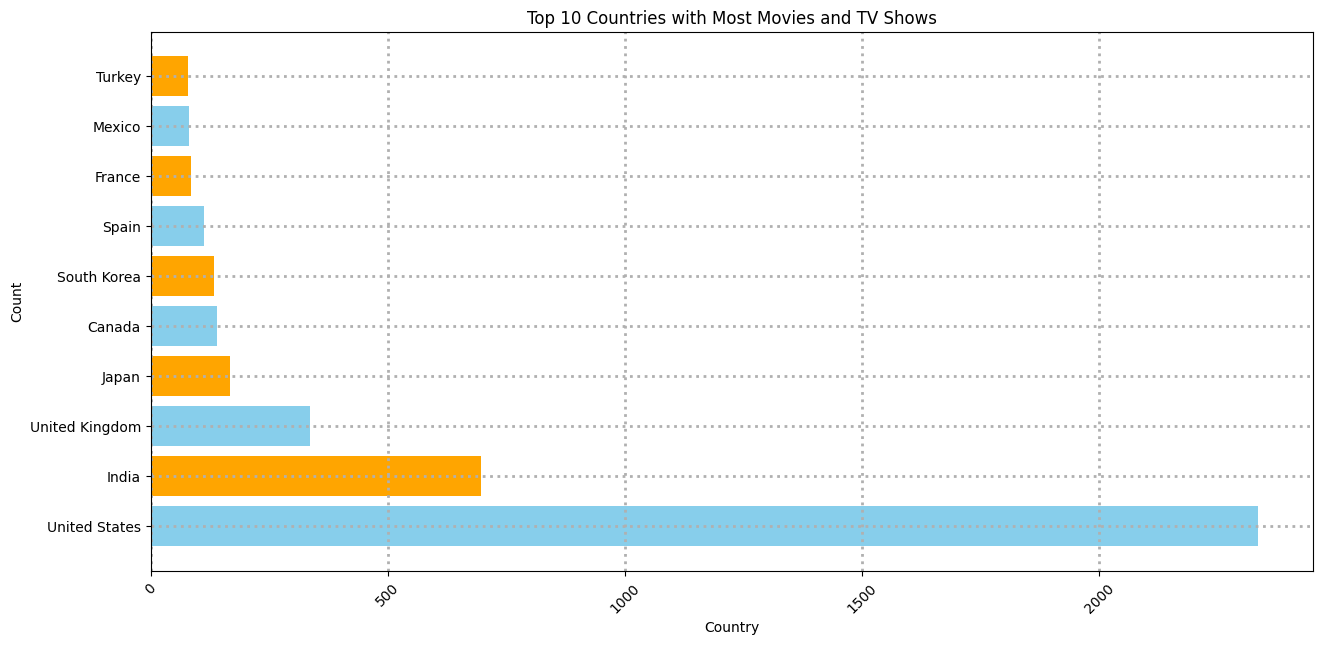

In [52]:
# total number of shows by country
country = df["country"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,7))
plt.barh(country.index[:10], country.values[:10], color=["skyblue","orange"])
plt.title("Top 10 Countries with Most Movies and TV Shows")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(linestyle=":",linewidth=2)
plt.show()

In [51]:
# total shows each year
each_year = df.groupby("release_year")["type"].value_counts()
print(each_year)

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2018          Movie      630
              TV Show    410
2019          TV Show    415
              Movie      347
2020          TV Show      1
Name: count, Length: 113, dtype: int64
